In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sn


# reading csv files
data =  pd.read_csv(r'D:\HomeWork\Pattern\SPR_HW3\inputs\P3\BOM.csv')

#remove rain tomorrow with null points
data = data.dropna(subset=['RainTomorrow'])

data.insert(loc=1, column='Month', value = data['Date'].apply(lambda x: x[5:7]))
data['Month'] = data['Month'].astype(int)


d = {'No':0, 'Yes':1}
data['RainToday'] = data['RainToday'].map(d)
data['RainTomorrow'] = data['RainTomorrow'].map(d)

data.head()

,Date,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,12,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0
1,2008-12-02,12,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0
2,2008-12-03,12,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0
3,2008-12-04,12,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0
4,2008-12-05,12,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0


In [7]:
#Preprocessing

In [8]:
newData = pd.DataFrame()

for month in range(1,13):
    
    dataFrame = data[data.Month.isin([month])]
    
    dataFrame['MinTemp'].fillna(dataFrame['MinTemp'].median(), inplace=True)
    dataFrame['MaxTemp'].fillna(dataFrame['MaxTemp'].median(), inplace=True)
    dataFrame['Rainfall'].fillna(dataFrame['Rainfall'].median(), inplace=True)
    dataFrame['WindGustDir'].fillna(dataFrame['WindGustDir'].mode()[0], inplace=True)
    dataFrame['WindGustSpeed'].fillna(dataFrame['WindGustSpeed'].median(), inplace=True)
    dataFrame['WindDir9am'].fillna(dataFrame['WindDir9am'].mode()[0], inplace=True)
    dataFrame['WindDir3pm'].fillna(dataFrame['WindDir3pm'].mode()[0], inplace=True)
    dataFrame['WindSpeed9am'].fillna(dataFrame['WindSpeed9am'].median(), inplace=True)
    dataFrame['WindSpeed3pm'].fillna(dataFrame['WindSpeed3pm'].median(), inplace=True)
    dataFrame['Humidity9am'].fillna(dataFrame['Humidity9am'].median(), inplace=True)
    dataFrame['Humidity3pm'].fillna(dataFrame['Humidity3pm'].median(), inplace=True)
    dataFrame['Pressure9am'].fillna(dataFrame['Pressure9am'].median(), inplace=True)
    dataFrame['Pressure3pm'].fillna(dataFrame['Pressure3pm'].median(), inplace=True)
    dataFrame['Temp9am'].fillna(dataFrame['Temp9am'].median(), inplace=True)
    dataFrame['Temp3pm'].fillna(dataFrame['Temp3pm'].median(), inplace=True)
    dataFrame['RainToday'].fillna(dataFrame['RainToday'].median(), inplace=True)
    dataFrame['RainTomorrow'].fillna(dataFrame['RainTomorrow'].median(), inplace=True)
    dataFrame['Cloud9am'].fillna(dataFrame['Cloud9am'].median(), inplace=True)
    dataFrame['Cloud3pm'].fillna(dataFrame['Cloud3pm'].median(), inplace=True)
    dataFrame['Evaporation'].fillna(dataFrame['Evaporation'].median(), inplace=True)
    dataFrame['Sunshine'].fillna(dataFrame['Sunshine'].median(), inplace=True)

    newData = pd.concat([newData, dataFrame])
    
newData = newData.sort_index()

In [9]:
#############

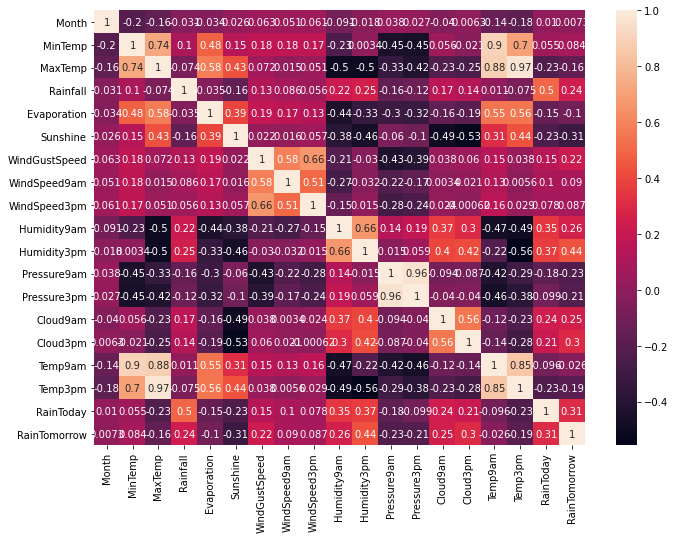

In [10]:
corr = newData.corr()
plt.figure(figsize=(11,8))
sn.heatmap(corr,annot=True)
plt.show()

In [12]:
#با مشاهده این 2 ماتریس میتوان به این نتیجه رسید که ویژگی های زیر را حذف کنیم

In [13]:
newData.drop(['Rainfall', 'WindGustDir', 'Pressure9am' , 'Date', 'Location', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Month','Cloud9am', 'Cloud3pm', 'Evaporation', 'Sunshine'], axis = 1, inplace = True)

In [14]:
X = newData.drop(columns = 'RainTomorrow')
y = newData.loc[:,'RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, shuffle=True)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.4, shuffle=True)

In [16]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
pred_i = knn.predict(X_validation)

y_pred = knn.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.8358416259362144


In [20]:
Features = ['MinTemp', 'MaxTemp', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']

data_rasht = pd.DataFrame([[8, 11, 7, 9, 100, 51.0, 1680, 3, 6, 2]], columns=Features)

rasht = knn.predict(data_rasht)

In [21]:
if rasht.all() == 1:
    print('yes')
else:
    print('NO')

NO
